<br />

<div style="text-align: center;">
<font size="4">2018年度　先進ゲノム支援情報解析中級者講習会 (11/19–21 @遺伝研)</font>
</div>
<br />
<br />
<div style="text-align: center;">
<font size="7">2-4 統計的仮説検定</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">遺伝研　森宙史</font>
</div>

<br />



In [4]:
#必要なモジュールのインポート
import numpy as np #numpy
import scipy as sp #scipy
import pandas as pd #pandas
import statistics
import statsmodels.stats.multitest as multi
from scipy import stats
from matplotlib import pyplot as plt #matplotlib
import seaborn as sns #seaborn
sns.set() #seaborn
%matplotlib inline

# 母集団と標本（サンプル）
- 母集団: 調べたい対象の全体<br />
（例）酵母のある条件でのmRNA全部<br />
- 標本: 母集団から無作為（ランダム）にN個抽出した集合<br />
（例）酵母のある条件でのmRNAをcDNA化して断片化してHiSeqでN read pairsシーケンシングした結果<br />
- サンプリング: 母集団から標本を得ること<br />
（例）RNA抽出してcDNA化してシーケンシング<br />
- サンプルサイズ: 標本の大きさ（N）<br />
（例）N read pairs<br />
- サンプル数: 標本を抽出した数<br />
（例）3 biological replicates<br />

# 標本データの尺度水準
- 名義尺度　カテゴリのみ　（例）A, B, C
- 順序尺度　カテゴリと順位　（例）大, 中, 小
- 間隔尺度と比率尺度　（例）定量的な数値データ（今回のデータ）

# 確率変数と確率分布
- 確率変数　とりうる値とその確率が決まっているもの　（例）コインの裏表
- 確率分布　確率変数とそれに付与された確率との対応を表したもの　（例）コインの裏表の確率分布　(裏) 0 = 1/2, (表) 1 = 1/2<br />

# 確率密度関数
名義尺度や順序尺度のデータは、離散値であるため、コインの裏の確率等、確率変数の各値の確率を計算することは容易。<br />
間隔尺度や比率尺度のデータは、連続値であるため、確率変数の各値の確率を計算することは困難。<br />
例えば、4 mmはもっと測定精度を上げると、4.1 mmや、4.001 mmかもしれず、4ちょうどになる確率に意味はほとんどない。<br />
したがって、4-5 mmの間等、ある程度間隔をとって確率変数の値がその間の値になる確率を表現する。<br />
実際は、区間で積分して密度として求めるので、間隔尺度や比率尺度の場合の確率を確率密度と呼び、連続型の確率変数の確率分布を、確率密度関数と呼ぶ。<br />

# 様々な確率分布
推測統計学では、母集団に仮定を置くことで推定を簡単にする。<br />
母集団の推定は、分布の形を推定する（何分布か）ことと、確率分布のパラメータを推定することの二つによって、構成される。<br />
母集団の分布<br />
- 正規分布<br />
マイナス無限からプラス無限までの実数値をとる<br />
平均値に近いほど確率密度が大きい<br />
確率密度の大きさは、平均値を中心に左右対称<br />
平均値と分散が正規分布において確率分布を特徴付けるパラメータ<br />

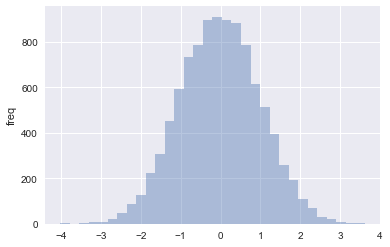

In [18]:
randn = np.random.randn(10000) #正規分布に従う乱数発生
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('freq')
sns.distplot(randn, kde=False, rug=False, bins=32)

<br />
- ポアソン分布<br />
カウントデータが従う離散型の確率分布<br />
0以上の整数のみ<br />
統計量λによって分布が決定される<br />

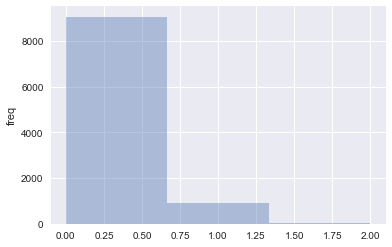

In [19]:
rand_poisson = np.random.poisson(lam=1.0/10, size=10000) #ポアソン分布に従う乱数発生
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('freq')
sns.distplot(rand_poisson, kde=False, rug=False, bins=3)

# 統計的仮説検定について
標本のデータを用いて母集団について議論するのが、推測統計学の目的<br />
推測統計学で扱う対象: 点推定・区間推定・統計的仮説検定<br />
標本から母集団を推定する都合上、必ず推定誤差が生じる。<br />
推定誤差がある前提で、「検証したい仮説」がある場合に、統計的仮説検定を行う。<br />
統計的仮説検定は、標本を使って、母集団に関する統計的な判断を下す方法。<br />

# 帰無仮説と対立仮説
検定の論理は、反証法（背理法）。差があることを証明するために、差がないとするには矛盾があることを証明する。<br />
- 帰無仮説: 棄却される対象になる仮説<br />
- 対立仮説: 実際に検証したい仮説<br />
帰無仮説が棄却できなくても、帰無仮説が正しいことが証明されたわけではない。差がないとは断言できず、「差があるとは言えない」とする。<br />

# p値
- p値:　標本が帰無仮説に従っていると考えた場合に、標本から計算した統計量が得られる確率。標本が帰無仮説に従っていると考えることにどの程度矛盾があるのかの目安となる指標。
- 有意水準（危険率）:　帰無仮説を棄却する基準となる値であり、α=0.05等、αで表す。検定を行う前に決めておく。<br />
どの程度p値が偏っていれば偶然では起こりにくい（有意）と考えるか。<br />
実際は、帰無仮説が正しいのに、それを誤って棄却する確率（Type 1 error)。<br />
逆に通常の検定では、帰無仮説が間違っているのに、誤って帰無仮説を採択してしまう確率（Type 2 error)は評価しない。<br />

# 片側検定と両側検定
通常は、違いがあるとする場合、大きいまたは小さいの2通り（両側）。
想定する仮説が、何らかの根拠を持って必ず大きい側または小さい側に偏ると考えられる場合のみ、片側検定を使う。<br /><br />


# 検定の使い分け
- パラメトリック検定: 母集団の分布について一定の仮定をおき、それに基づいて統計的仮説検定を行うもの
- ノンパラメトリック検定: 母集団の分布について特別の仮定をおく必要がないもの<br />
分布に仮定をおくという概念は間隔尺度および比率尺度に固有のものである。<br />
そもそも、名義尺度や順序尺度のデータに対する検定は、全てノンパラメトリック検定になる。<br />
<br />
<br />
<div style="text-align: center;">
<font size="5">大まかな検定の区分</font>
<br />
（検定手法は他にもたくさんあります）
</div>

データ形式 | 尺度水準 | 検定手法
------ | ------ | ------  
1群 | 名義尺度 | 二項検定、カイ二乗適合度検定
1群 | 間隔・比尺度 | 平均値の検定
独立2群 | 名義尺度 | カイ二乗独立性の検定、Fisherの正確確率検定、比率の差の検定
独立2群 | 順序尺度 | Mann–WhitneyのU検定（Wilcoxonの順位和検定）
独立2群 | 間隔・比尺度 | t検定、等分散の検定（F検定）
関連2群 | 名義尺度 | 符号検定
関連2群 | 順序尺度 | Wilcoxonの符号順位検定
関連2群 | 間隔・比尺度 | 対応のあるt検定（paired t検定）
独立多群 | 名義尺度 | カイ二乗独立性の検定
独立多群 | 順序尺度 | Kruskal–Wallis検定
独立多群 | 間隔・比尺度 | 一元配置分散分析
関連多群 | 名義尺度 | カイ二乗独立性の検定
関連多群 | 順序尺度 | Friedman検定
関連多群 | 間隔・比尺度 | 二元配置分散分析
<br />

それでは、実際に検定を行っていく。<br />

In [2]:
#　カレントディレクトリにinput/があるか確認
%ls

:q                                  Sample22.py
MarkDownPractice.ipynb              Sample23.py
Practice4.3.py                      Sample24.py
Practice4.4.py                      Sample25.py
Practice5.3.py                      Sample26.py
Practice7.1.py                      Sample27.py
Sample.txt                          Sample28.py
Sample1.py*                         Sample29.py
Sample10.py                         Sample30.py
Sample11.py                         Sample31.py
Sample12.py                         Sample32.py
Sample13.py                         Sample8.py
Sample14.py                         Sample9.py
Sample15.py                         StatisticalHypothesisTesting.ipynb
Sample16.py                         StatsPractice.ipynb
Sample17.py                         __pycache__/
Sample18.py                         input/
Sample19.py                         myclass1.py
Sample20.py                         test1.txt
Sample21.py


In [5]:
#　データを読み込む
rawtag = pd.read_table("input/count_raw.tsv")
tpm = pd.read_table("input/count_tpm.tsv")

In [6]:
# 中身を少し見てみる
rawtag.head()

,gene_id,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,gene_0001,0,2,6,0,0,1
1,gene_0002,0,0,0,0,0,0
2,gene_0003,0,0,0,0,0,0
3,gene_0004,0,0,0,0,0,0
4,gene_0005,2,8,10,6,7,18


In [7]:
# 中身を少し見てみる
tpm.head()

,gene_id,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
0,gene_0001,0.00000,0.734587,3.129839,0.000000,0.000000,0.504810
1,gene_0002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,gene_0003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,gene_0004,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,gene_0005,0.94849,2.799529,4.969954,4.689762,4.372026,8.657291


In [8]:
# 中身を要約する
rawtag.describe()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,762.996490,1045.147418,756.142403,513.784891,646.752131,819.398964
std,2340.621813,3317.458482,2480.278261,1231.551981,1778.429371,2218.882875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,156.000000,109.000000,121.000000,144.000000,184.000000
50%,287.000000,376.000000,266.000000,237.000000,285.000000,364.000000
75%,602.000000,816.000000,580.000000,467.500000,569.000000,730.500000
max,72079.000000,102148.000000,76964.000000,34808.000000,52707.000000,65855.000000


In [9]:
# 中身を要約する
tpm.describe()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
count,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,167.140231,167.140231,167.140231,167.140231,167.140231,167.140231
std,676.764751,718.557714,660.514608,518.206747,588.978425,592.809952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.142105,17.065011,17.179998,27.690041,26.786171,25.795361
50%,38.074356,36.870840,36.978465,52.769183,50.497338,49.894817
75%,89.884201,87.009136,88.036030,119.126766,113.792307,113.755712
max,21341.957332,25472.407296,18882.116608,13693.378889,19157.473199,19225.835800


TPM (Transcripts Per Million)は、RPKM/FPKMに代わって最近よく使われるようになった、データの補正方法である。<br />
RPKM/FPKMと比べて、[サンプル間の補正が正確。](https://www.ncbi.nlm.nih.gov/pubmed/22872506)<br />
RPKM/FPKMはマップされた全リード数を重要視しているが、残念ながら、全リード数は実験に用いたmRNA全体の個数とは比例しない。<br />
長いmRNAからはリードがたくさんシーケンスされるため、発現しているmRNA全体の長さの分布によって、同じ個数のmRNAから得られる全リード数は異なる。<br />
同じN個のmRNAをRNA-seq実験に使ったサンプル間であっても、長い遺伝子が多く発現しているサンプルでは全リード数が多く、短い遺伝子が多く発現していたら全リード数は少なくなる。真に補正すべきは実験に用いたmRNA全体の個数なのに、全リード数で補正するとずれてしまう。<br />
TPMでは、全リード数で割り算するのではなく、まず各遺伝子の長さでマップされたリード数を調整した値を計算し、その和で補正する。<br />

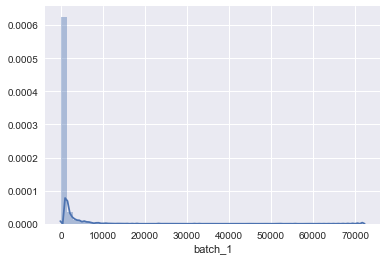

In [10]:
# データの分布を図示
sns.distplot(rawtag.batch_1)

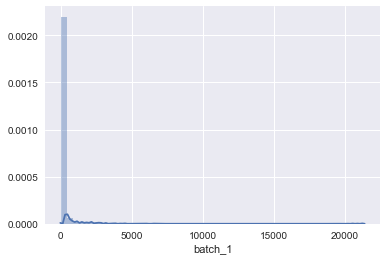

In [11]:
# データの分布を図示
sns.distplot(tpm.batch_1)

rawtagもtpmも正規分布というよりはポアソン分布に近そう。

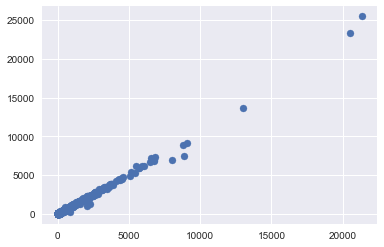

In [16]:
# サンプル間の対応関係を散布図で見てみる
plt.scatter(tpm.batch_1, tpm.batch_2)

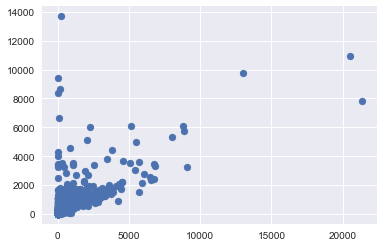

In [17]:
# サンプル間の対応関係を散布図で見てみる
plt.scatter(tpm.batch_1, tpm.chemostat_1)

batchとchemostatは違いがあるかも?

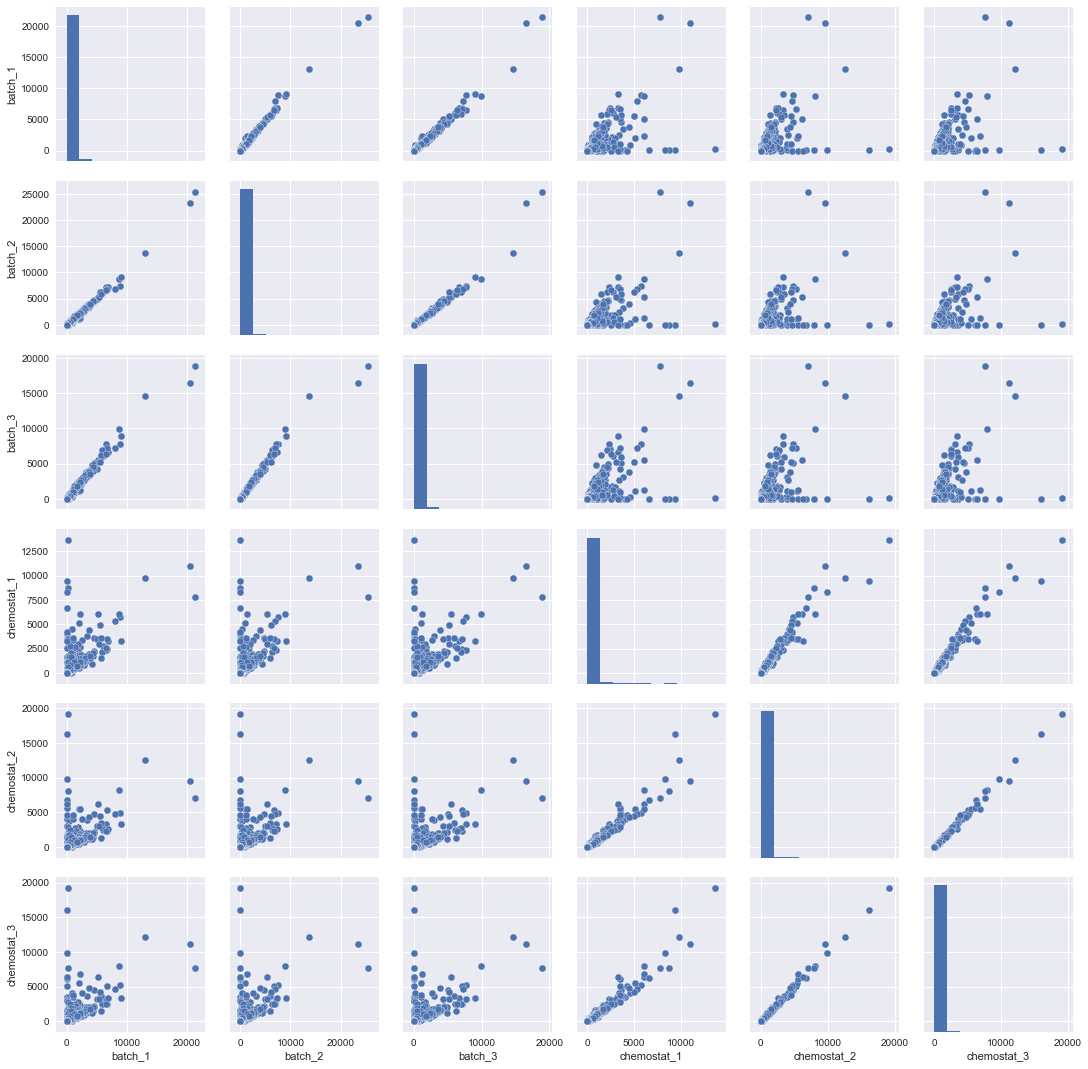

In [18]:
# 全組み合わせの散布図を表示
sns.pairplot(tpm)

In [24]:
# Spearman相関係数を計算してみる
corr, p = stats.spearmanr(tpm.batch_1, tpm.batch_2)
print("Spearman correlation:" + str(corr))
print("p value:" + str(p))

Spearman correlation:0.990225619488
p value:0.0


In [25]:
# Spearman相関係数を計算してみる
corr, p = stats.spearmanr(tpm.batch_1, tpm.chemostat_1)
print("Spearman correlation:" + str(corr))
print("p value:" + str(p))

Spearman correlation:0.829813969825
p value:0.0


遺伝子ごとの発現パターンは、batchとchemostat間でもかなり似ている。

In [38]:
# Mann–Whitney U検定でbatchとchemostat間で全体的な遺伝子発現量に違いがあるかを検定してみる
b1c1 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_1, alternative="two-sided") #alternative="two-sided"を指定しないと片側検定になってしまう
b1c2 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_2, alternative="two-sided")
b1c3 = stats.mannwhitneyu(tpm.batch_1, tpm.chemostat_3, alternative="two-sided")
b2c1 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_1, alternative="two-sided")
b2c2 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_2, alternative="two-sided")
b2c3 = stats.mannwhitneyu(tpm.batch_2, tpm.chemostat_3, alternative="two-sided")
b3c1 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_1, alternative="two-sided")
b3c2 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_2, alternative="two-sided")
b3c3 = stats.mannwhitneyu(tpm.batch_3, tpm.chemostat_3, alternative="two-sided")
print(b1c1.pvalue, b1c2.pvalue, b1c3.pvalue, "\n", b2c1.pvalue, b2c2.pvalue, b2c3.pvalue, "\n", b3c1.pvalue, b3c2.pvalue, b3c3.pvalue)

2.37326601442e-50 2.21509035625e-40 2.5317567731e-34 
 4.75484897894e-61 3.3704213894e-50 1.87394985234e-43 
 4.82195436331e-58 1.91035850971e-47 6.4908541383e-41


全体像はわかったので、<br />次に、batchとchemostat間で各遺伝子がどの程度発現量が有意に異なるのかを検定する。<br />

In [41]:
# カイ二乗独立性の検定でとりあえず最初の10遺伝子を検定してみる
# カイ二乗独立性の検定はカウントデータを使うので、rawtagを使う
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3) #batch 3 replicateのタグカウントの合計を計算
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3) #chemostat 3 replicateのタグカウントの合計を計算
ar = []
for i in range(10):
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i] #i番目の遺伝子のbatch 3 replicateでのタグカウントの合計を計算
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i] #i番目の遺伝子のchemostat 3 replicateでのタグカウントの合計を計算
    sxr = sx - x #i番目の遺伝子以外の全遺伝子の、batch 3 replicateでのタグカウントの合計を計算
    syr = sy - y #i番目の遺伝子以外の全遺伝子の、chemostat 3 replicateでのタグカウントの合計を計算
    if ( rawtag.batch_1[i] == 0 or rawtag.batch_2[i] == 0 or rawtag.batch_3[i] == 0 or rawtag.chemostat_1[i] == 0 or rawtag.chemostat_2[i] == 0 or rawtag.chemostat_3[i] == 0):
        ar.append(1)
        #カイ二乗独立性の検定では、各値のどれかが0だと検定の精度が悪くなるため、そのようなデータの場合には検定をせずにp値を1とする
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
print(ar)

[1, 1, 1, 1, 0.019386025783238461, 1, 1, 1, 1.9860852727046511e-13, 0.0]


上記だと、検定を何回も繰り返している。一回ずつの検定のエラー率はα、今回は0.05であるが、繰り返す検定の数が増えるほど、どれか一回間違えてしまう確率（これを、familywise error rateと呼ぶ）も上がる。<br />
とりあえず厳し目に、検定全体で一回でも間違える確率（familywise error rate）を一定以下に制御したい。<br />
そのような場合に用いられるp値の補正方法である、Bonferroni補正を行う。<br />
Bonferroni補正では、0.05等の個々の検定のp値を、検定回数で割って得られた値を有意性の判定に用いる方法である。<br />

In [44]:
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3)
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3)
ar = []
for i in range(10):
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i]
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i]
    sxr = sx - x
    syr = sy - y
    if ( rawtag.batch_1[i] == 0 or rawtag.batch_2[i] == 0 or rawtag.batch_3[i] == 0 or rawtag.chemostat_1[i] == 0 or rawtag.chemostat_2[i] == 0 or rawtag.chemostat_3[i] == 0):
        ar.append(1)
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
print(ar)
pval_corr = multi.multipletests(ar, alpha=0.05, method='Bonferroni') #α=0.05として、Bonferroni補正を行う
print(pval_corr[1])

[1, 1, 1, 1, 0.019386025783238461, 1, 1, 1, 1.9860852727046511e-13, 0.0]
[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.93860258e-01   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.98608527e-12   0.00000000e+00]


Bonferroni補正はかなり厳しい補正方法である。<br />
そこで、familywise  error  rateの代わりに、有意差ありと判定された結果の中に本当は差が無いものを含む確率（False  Discovery  Rate）を一定の水準以下にする、FDRをp値の代わりに用いる手法での補正方法を試してみる。<br />
FDRの計算方法にはいくつか種類があるが、一番基本的なBenjamini Hochberg法では、各検定で得られたp値を小さい順に並べて、N/順位をp値にかけることで個別の検定におけるFDRを求める。多くの場合、FDRはp値と区別するためにq値と呼ばれる。<br />

In [57]:
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3)
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3)
ar = []
for i in range(10):
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i]
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i]
    sxr = sx - x
    syr = sy - y
    if ( rawtag.batch_1[i] == 0 or rawtag.batch_2[i] == 0 or rawtag.batch_3[i] == 0 or rawtag.chemostat_1[i] == 0 or rawtag.chemostat_2[i] == 0 or rawtag.chemostat_3[i] == 0):
        ar.append(1)
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
print(ar)
pval_corr = multi.multipletests(ar, alpha=0.05, method='fdr_bh') #Benjamini Hochberg法でFDRを計算する
print(pval_corr[1])

[1, 1, 1, 1, 0.019386025783238461, 1, 1, 1, 1.9860852727046511e-13, 0.0]
[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   6.46200859e-02   1.00000000e+00   1.00000000e+00   1.00000000e+00
   9.93042636e-13   0.00000000e+00]


In [46]:
# 1.9860852727046511e-13 * 10/2は9.93042636e-13になるはず
1.9860852727046511e-13 * 10/2

9.930426363523256e-13

In [48]:
# 全遺伝子で検定をし、FDRを求めてファイルに出力する
sx = sum(rawtag.batch_1) + sum(rawtag.batch_2) + sum(rawtag.batch_3)
sy = sum(rawtag.chemostat_1) + sum(rawtag.chemostat_2) + sum(rawtag.chemostat_3)
ai = len(rawtag.batch_1)
ar = []
for i in range(ai):
    x = rawtag.batch_1[i] + rawtag.batch_2[i] + rawtag.batch_3[i]
    y = rawtag.chemostat_1[i] + rawtag.chemostat_2[i] + rawtag.chemostat_3[i]
    sxr = sx - x
    syr = sy - y
    if ( rawtag.batch_1[i] <= 0 or rawtag.batch_2[i] <= 0 or rawtag.batch_3[i] <= 0 or rawtag.chemostat_1[i] <= 0 or rawtag.chemostat_2[i] <= 0 or rawtag.chemostat_3[i] <= 0):
        ar.append(1)
    else:
        forchi = np.array([[x,y],[sxr,syr]])
        chi = stats.chi2_contingency(forchi)
        ar.append(chi[1])
pval_corr = multi.multipletests(ar, alpha=0.05, method='fdr_bh')
np.savetxt('test1.txt', pval_corr[1]) 

In [56]:
%pwd

In [ ]:
%less pwdの結果のパス/test1.txt

<br />
# 実際のRNA-Seqにおける統計的仮説検定
様々な分野において、統計的仮説検定は下記のように段階を踏んで高度化していく。<br />
- 一般的な統計的仮説検定（今回紹介した方法）を用いる段階
- 近隣分野の似たような問題で使われている検定手法を用いる段階（DNAマイクロアレイ解析からRNA-Seq解析、RNA-Seq解析からメタゲノム解析等）
- その問題に特化した検定手法を用いる段階<br /><br />
RNA-Seqにおける統計的仮説検定は、すでに第3段階に入りつつある。<br />
具体的には、個々の遺伝子の発現量の検定には、[DESeq2](http://www.ncbi.nlm.nih.gov/pubmed/25516281)や[edgeR](https://www.ncbi.nlm.nih.gov/pubmed/19910308)等のRNA-Seqの発現量比較に特化した検定手法が主に用いられるようになっている。<br />
両手法とも、RNA-Seqのリードのカウントデータの分布が、負の二項分布に従うという仮定による統計手法である。<br />
下記のように、RNA-Seqのリードのカウントデータの分布は、見た目上ポアソン分布に従うように見える。<br />
しかし、実際は分散が通常のポアソン分布よりも大きく、ポアソン分布に変数をもう一つ加えた、負の二項分布の方がより良いあてはめが可能。<br />
どちらの手法も、リードのカウントデータから、母集団の負の二項分布のパラメータ推定を行い、得られた統計モデルを検定に用いる。<br />
残念ながら、かなり特化した統計手法なため、手法の開発者が用いたプログラミング言語（両手法ともR言語）以外ではほとんど実装されておらず、Pythonにも検証が十分にされて信頼できるライブラリは未だ存在しない。<br />
それらの検定手法を用いたい場合には、Rを用いることをお勧めする。<br />

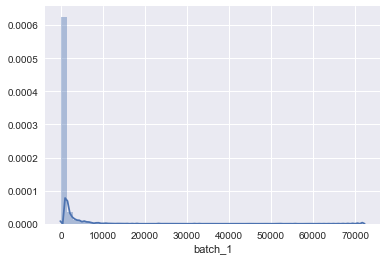

In [58]:
sns.distplot(rawtag.batch_1)